In [1]:
from algorithms.prioritized_sweeping import *
from domains.extra_large_grid_world import *
from algorithms.value_iteration import *
from domains.cat_vs_monsters import *
from domains.gridworld import *
from fine_tuning.evolution_strategies_for_prioritized_sweeping import *
from matplotlib import pyplot as plt
from utils.utils import *
import pandas as pd

In [ ]:
def run_domain(domain, domain_name, prioritized_sweeping_args, hyperparameter_bounds, es_pop_size, es_num_generations, es_top_parents, es_mutation_strength, es_num_avg, es_keep_parents, is_decaying_mutation):
    print(f"-- {domain_name} Domain --\n")
    instance = ValueIteration(domain)
    cvm_v_map, cvm_policy_map, iterations = instance.run_standard_value_iteration(init_func)
    print("Actual Optimal Value Function of States\n")
    df = pd.DataFrame(cvm_v_map)
    print(df)
    print("\nActual Optimal Policy Map of States\n")
    df = pd.DataFrame(cvm_policy_map)
    print(df)
    print("\nRunning Prioritized Sweeping Algorithm...\n")

    instance = PrioritizedSweeping(domain, cvm_v_map)
    q_map, max_norm_val, iterations, elapsed_time = instance.prioritized_sweeping(*prioritized_sweeping_args)

    print(f"The prioritized sweeping algorithm terminated after {iterations} iterations")
    print(f"It achieved a max norm value of {max_norm_val}, taking {elapsed_time:.4f} seconds\n")

    ps_vmap, ps_policy_map = get_vmap_policy_map(q_map, instance)
    print("Value Function of States output by Prioritized Sweeping\n")
    df = pd.DataFrame(ps_vmap)
    print(df)
    print("\n")

    df = pd.DataFrame(ps_policy_map)
    print(df)

    print(f"\nRunning Evolution Strategy for Prioritized Sweeping Algorithm, on {domain_name} domain...\n")

    es_ps = EvolutionStrategyForPrioritizedSweeping(prioritized_sweeping=PrioritizedSweeping, mdp=domain, optimal_v_map=cvm_v_map)
    best_params, min_loss, generation_min_loss_list = es_ps.run_es(hyperparameter_bounds, pop_size=es_pop_size, generations=es_num_generations, top_parents=es_top_parents, mutation_strength=es_mutation_strength, num_avg=es_num_avg, keep_parents=es_keep_parents, decaying_mutation=is_decaying_mutation)

    print("Best hyperparameters found:", best_params)
    print("Best Max Norm Value:", min_loss)

    plt.figure(figsize=(10, 6))
    plt.plot(generation_min_loss_list)
    plt.xlabel("Generation")
    plt.ylabel("Best Max Norm Value")
    plt.grid(True)
    plt.show()

    print("\nRunning Prioritized Sweeping Algorithm on Fine-tuned Hyperparameters...\n")

    instance = PrioritizedSweeping(domain, cvm_v_map)
    q_map, max_norm_val, iterations, elapsed_time = instance.prioritized_sweeping(*best_params)

    print(f"The prioritized sweeping algorithm terminated after {iterations} iterations")
    print(f"It achieved a max norm value of {max_norm_val}, taking {elapsed_time:.4f} seconds\n")

    ps_vmap, ps_policy_map = get_vmap_policy_map(q_map, instance)
    print("Value Function of States output by Prioritized Sweeping\n")
    df = pd.DataFrame(ps_vmap)
    print(df)
    print("\n")

    df = pd.DataFrame(ps_policy_map)
    print(df)

    print(f"\nRunning Evolution Strategy for Prioritized Sweeping Algorithm, on {domain_name} domain...\n")

-- Cat vs Monsters Domain --

Actual Optimal Value Function of States

        0       1       2       3       4
0  2.6637  2.9968  2.8116   3.667  4.8496
1  2.9712    3.51  4.0818  4.8496  7.1647
2  2.5935       X       X       X  8.4687
3  2.0992  1.0849       X  8.6097  9.5269
4  1.0849  4.9465  8.4687  9.5269  0.0000

Actual Optimal Policy Map of States

   0     1  2     3  4
0  →     ↓  ←  ↓(M)  ↓
1  →     →  →     →  ↓
2  ↑     X  X     X  ↓
3  ↑     ←  X     ↓  ↓
4  ↑  →(M)  →     →  G

Running Prioritized Sweeping Algorithm...

The prioritized sweeping algorithm terminated after 1000 iterations
It achieved a max norm value of 3.3089366510008986, taking 1.4022 seconds

Value Function of States output by Prioritized Sweeping

          0         1         2         3         4
0  4.235364  4.796183   4.47488  6.359575  7.031301
1  4.946781  5.440227   6.23741  6.902599  7.501873
2  4.308292         X         X         X  8.256589
3  3.861270  3.408498         X   8.30762  9.3934

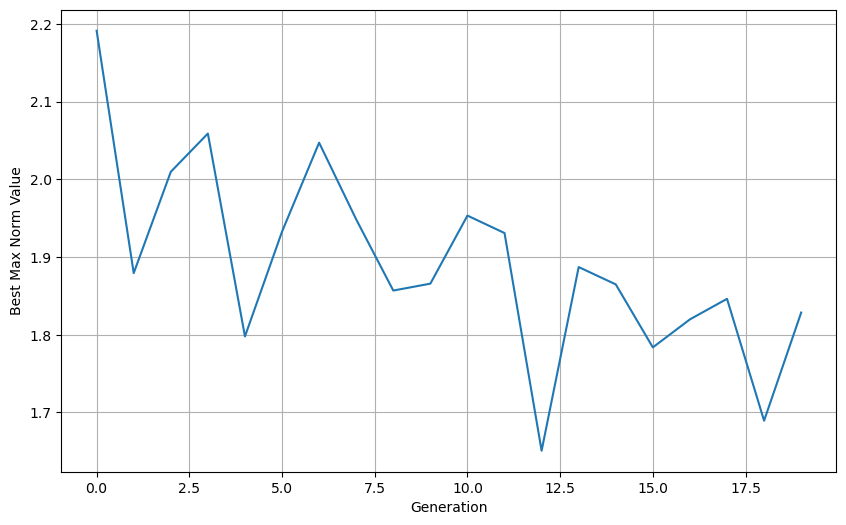


Running Prioritized Sweeping Algorithm on Fine-tuned Hyperparameters...

The prioritized sweeping algorithm terminated after 293 iterations
It achieved a max norm value of 1.9830911781493699, taking 0.4302 seconds

Value Function of States output by Prioritized Sweeping

          0         1         2         3         4
0  3.124005  3.601748  3.852718  5.445853  6.832691
1  3.403318  4.008424  4.848885  5.877292  6.987235
2  3.193119         X         X         X  8.185339
3  2.333811  1.911031         X  8.050656  9.441293
4  1.880022  4.781274  7.321197  8.743428  0.000000


   0     1  2     3  4
0  ↓     →  ←  ↓(M)  →
1  →     →  →     →  →
2  ↑     X  X     X  ↓
3  ↑     ↑  X     →  ↓
4  ←  →(M)  →     →  G

Running Evolution Strategy for Prioritized Sweeping Algorithm, on Cat vs Monsters domain...

-- 687-Gridworld Domain --

Actual Optimal Value Function of States

        0       1       2       3       4
0  4.0187  4.5548  5.1576  5.8337  6.4553
1  4.3716  5.0324  5.8013  6

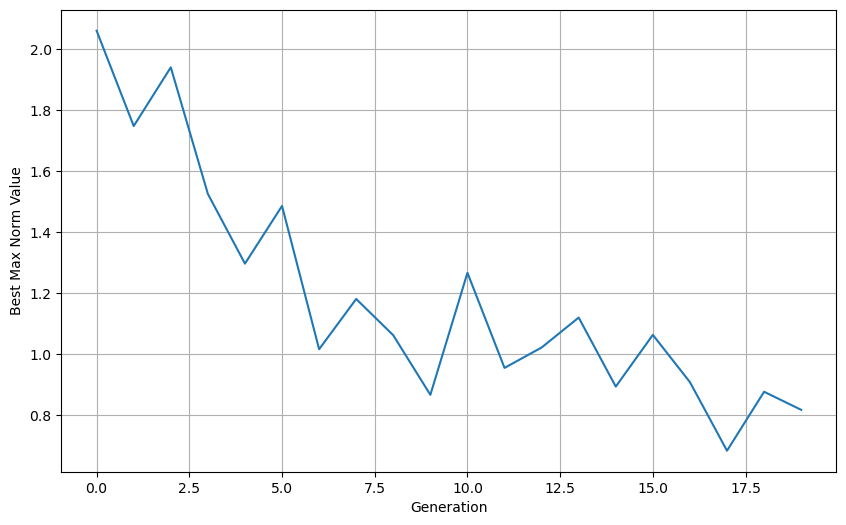


Running Prioritized Sweeping Algorithm on Fine-tuned Hyperparameters...

The prioritized sweeping algorithm terminated after 161 iterations
It achieved a max norm value of 0.4923995613359837, taking 0.1945 seconds

Value Function of States output by Prioritized Sweeping

          0         1         2         3         4
0  3.841578  4.466493   5.07992  5.866426  6.719403
1  4.497361  5.213506  5.810621  6.872519  7.593010
2  4.013031  4.649434         X  7.754151  8.494212
3  3.416383  4.017732         X  8.650949  9.810472
4  2.899534  3.423300  6.243778  9.571574  0.000000


   0  1     2  3  4
0  →  →     ↓  →  ↓
1  →  →     →  →  ↓
2  →  ↑     X  ↓  ↓
3  ↑  ↑     X  ↓  ↓
4  →  ↑  →(M)  →  G

Running Evolution Strategy for Prioritized Sweeping Algorithm, on 687-Gridworld domain...



In [5]:
theta, alpha, epsilon = 0.1, 0.1, 0.1
prioritized_sweeping_args = [theta, alpha, epsilon]
hyperparameter_bounds = {'theta': (0.01, 0.75),'alpha': (0.01, 0.75),'epsilon': (0.01, 0.75),'n': (1, 100),'niter': (50, 500),'episode_length': (50, 500)}
es_params = [20, 25, 5, 0.05, 10, 2, True]
run_domain(Cat_vs_Monsters(), "Cat vs Monsters", prioritized_sweeping_args, hyperparameter_bounds, *es_params)
run_domain(Gridworld(), "687-Gridworld", prioritized_sweeping_args, hyperparameter_bounds, *es_params)

-- Extra Large Grid World Domain --

Actual Optimal Value Function of States

         0        1        2        3        4        5        6        7  \
0  33.6179  33.5479        X  34.1179  32.6413  31.3431  32.4251  27.6124   
1  33.5479   33.682  33.2032  33.6849  34.1821  33.3471        X  32.4892   
2        X  33.2032  33.4171  34.3152        X        X        X        X   
3  34.1179  33.6849  34.3152  30.3404  34.4974  37.0236   39.325        X   
4  32.6413  34.1821        X  34.4974   40.929  35.3993  40.1591        X   
5  31.3431  33.3471        X  37.0236  35.3993  44.7065  39.2009        X   
6  32.4251        X        X   39.325  40.1591  39.2009      0.0  39.1443   
7  27.6124  32.4892        X        X        X        X  39.1443  43.8573   
8  31.4978   30.846  32.5533  36.7806  34.9593  40.6478        X        X   
9  24.9943  31.5619   33.097  33.9868  36.8447  35.0159  40.9154  40.9988   

         8        9  
0  31.4978  24.9943  
1   30.846  31.5619  
2  32.55

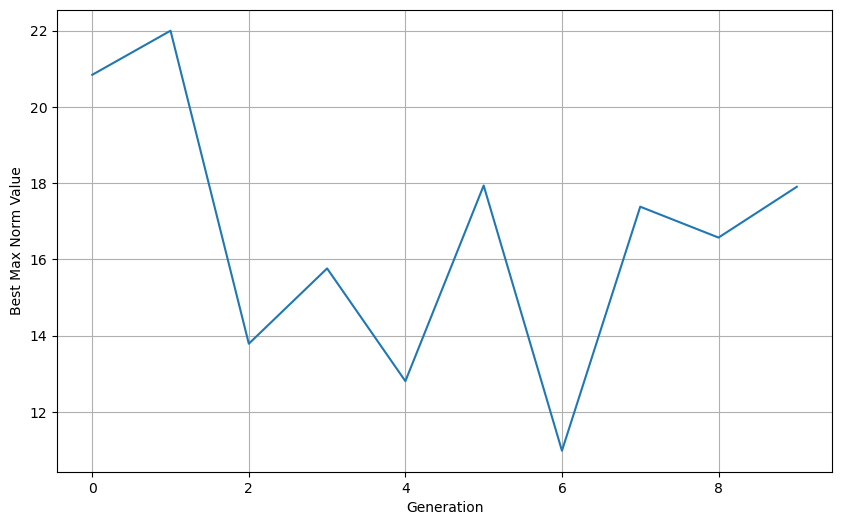


Running Prioritized Sweeping Algorithm on Fine-tuned Hyperparameters...

The prioritized sweeping algorithm terminated after 69 iterations
It achieved a max norm value of 36.7806, taking 5.2616 seconds

Value Function of States output by Prioritized Sweeping

           0          1          2          3          4          5  \
0  25.745569   26.13038          X  25.195886  28.245296  26.322383   
1  25.643284  28.017937  30.124987  29.538389  29.263277  26.665961   
2          X  30.722402  33.857316  33.441531          X          X   
3  31.026156  34.296093  34.602025  34.549027  36.249908  38.792664   
4  35.308782  34.195488          X  44.560274  20.369546  41.648027   
5  35.584103  38.923327          X  39.923936  39.434166  48.714202   
6  39.576114          X          X  43.293499  44.417717  23.043123   
7  36.023176  42.355275          X          X          X          X   
8   37.42347  41.266593   0.045166        0.0   2.825254   27.79243   
9  27.316025  25.456037   7.2

In [6]:
run_domain(Extra_Large_Grid_World(), "Extra Large Grid World", prioritized_sweeping_args, hyperparameter_bounds, 10, 10, 3, 0.05, 1, 1, False)